In [230]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
a0 = pd.read_csv('currency_high.csv')
# a0 = a0.drop(['Unnamed: 0'], axis=0 )
a0
# a0.shape
# assets = pd.read_csv('asset_details.csv') 
# assets 

,Unnamed: 0,time,open,high,low,close,volume
0,0,1675029600,23793.54,23801.59,23795.09,23798.45,6.687212
1,1,1675029540,23793.36,23807.91,23793.72,23795.07,8.532395
2,2,1675029480,23788.53,23805.23,23800.77,23794.85,11.150775
3,3,1675029420,23793.78,23812.28,23796.64,23799.48,12.816058
4,4,1675029360,23794.49,23809.10,23808.04,23794.49,13.154972
...,...,...,...,...,...,...,...
295,295,1675011900,23586.39,23613.27,23603.02,23594.15,26.035320
296,296,1675011840,23586.86,23605.11,23599.99,23603.10,10.947273
297,297,1675011780,23595.25,23609.63,23605.46,23600.03,22.033851
298,298,1675011720,23588.74,23609.62,23588.74,23607.63,17.133114


In [231]:
b0 = a0['open']
c0 = a0['high']
d0 = a0['low']
e0 = a0['close']
f0 = a0['volume']
i0 = a0['time']

In [232]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
fig = go.Figure(data=[go.Candlestick(x=a0, 
                                     open=b0, 
                                     high=c0, 
                                     low=d0, 
                                     close=e0)])
print('Use the slider to Adjust and Zoom')
fig.show()

Use the slider to Adjust and Zoom


In [233]:
import numpy as np
avg=np.average(b0)   
avg1=np.average(c0) 
avg2=np.average(d0)
avg3=np.average(e0)
print('avg OPEN : {}, avg High : {}, avg LOW : {}, avg CLOSE : {}\n\n'.format(avg,avg1,avg2,avg3))   


avg OPEN : 23708.020233333333, avg High : 23732.775733333332, avg LOW : 23719.6684, avg CLOSE : 23720.790800000002




In [234]:
import plotly.express as px
data = dict(
    number=[b0,c0,d0,e0],
    stage=[ "Open", "High", "Low", "Close"])
fig = px.funnel(a0[:500], x=f0[:500], y=b0[:500])
fig.show()

In [235]:
data = dict(
    number=[b0,c0,d0,e0],
    stage=[ "Open", "High", "Low", "Close"])
fig = px.funnel(a0, x=i0, y=b0)
fig.show()

In [236]:
background = f0
x = i0
y = b0
x_df = pd.DataFrame(x)  
y_df = pd.DataFrame(y) 
background_df = pd.DataFrame(background) 
x = x_df 
y = y_df 
background = background_df

In [237]:
extract = x.join(background) 
extract = extract.join(y)
extract 
data = extract.to_csv('data/extraction_data.csv') 
data = pd.read_csv('data/extraction_data.csv')
data = data.drop(['Unnamed: 0'],axis=1) 
data 
from sklearn.decomposition import PCA, FastICA
X= data['time'] 
y = data['open'] 
background = data['volume']

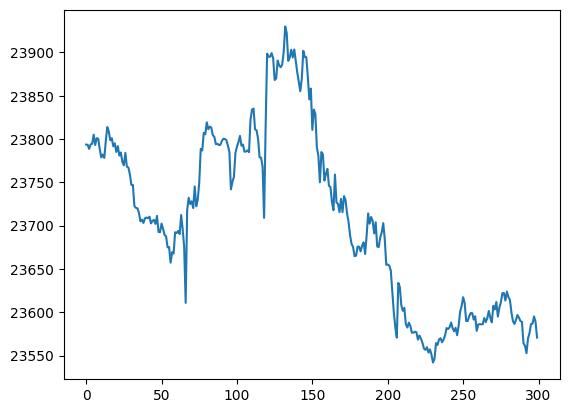

In [238]:
# # plt.scatter(x,y)
# plt.hist2d(y,background) 
plt.plot(y) 
# plt.plot(x)

(array([[ 6., 21.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 4., 26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [23.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  3.,  7., 13.,  6.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  5., 11.,  7.,  5.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.],
        [ 0.,  0.,  0.,  0.,  1.,  4., 22.,  3.,  0.,  0.],
        [ 0.,  1.,  0.,  5.,  8.,  2., 12.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 10., 17.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  5., 24.,  1.,  0.,  0.]]),
 array([1.67501166e+09, 1.67501345e+09, 1.67501525e+09, 1.67501704e+09,
        1.67501884e+09, 1.67502063e+09, 1.67502242e+09, 1.67502422e+09,
        1.67502601e+09, 1.67502781e+09, 1.67502960e+09]),
 array([23542.03 , 23580.816, 23619.602, 23658.388, 23697.174, 23735.96 ,
        23774.746, 23813.532, 23852.318, 23891.104, 23929.89 ]),
 <matplotlib.collections.QuadMesh at 0x1ab15fe2c08>)

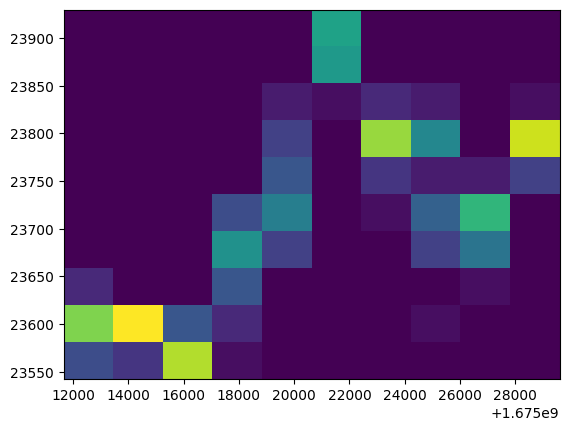

In [239]:
plt.hist2d(data['time'],data['open']) 


(array([[19.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [25.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [29.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11., 14.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 7., 11.,  8.,  0.,  2.,  0.,  0.,  0.,  1.,  1.],
        [ 6., 15.,  7.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [15., 13.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
        [16., 13.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [23.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [24.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([1.67501166e+09, 1.67501345e+09, 1.67501525e+09, 1.67501704e+09,
        1.67501884e+09, 1.67502063e+09, 1.67502242e+09, 1.67502422e+09,
        1.67502601e+09, 1.67502781e+09, 1.67502960e+09]),
 array([  2.18173204,  18.89773397,  35.6137359 ,  52.32973783,
         69.04573976,  85.76174169, 102.47774362, 119.19374555,
        135.90974748, 152.62574941, 169.34175134]),
 <matplotlib.col

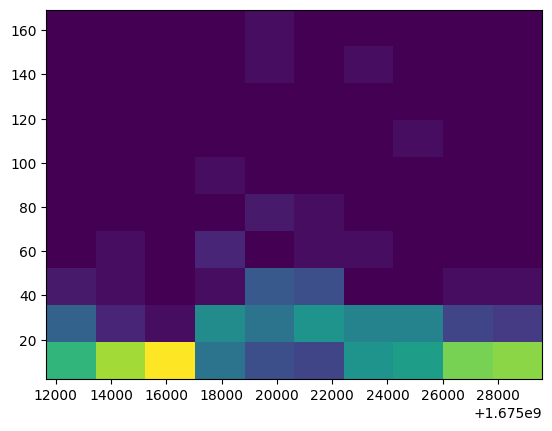

In [240]:
plt.hist2d(data['time'],data['volume']) 

Populating the interactive namespace from numpy and matplotlib


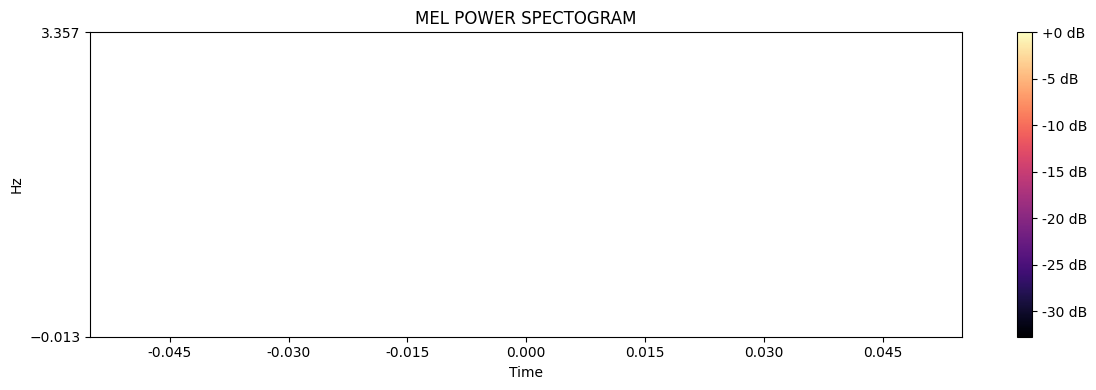

In [241]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import librosa
import keras
import librosa.display
%pylab inline
import glob
data = np.squeeze(np.asarray(np.matrix(data)[:,1])) 
sam_rate = np.squeeze(np.asarray(np.matrix(data)[:,0])) 
D = np.abs(librosa.stft(data))**2
S = librosa.feature.melspectrogram(data,sr=sam_rate,S=D,n_mels=128)
log_S1 = librosa.power_to_db(S,ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S1,sr=sam_rate,x_axis='time',y_axis='mel')
plt.title('MEL POWER SPECTOGRAM')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

### RECIEVING SIGNAL

In [242]:
librosa.get_duration(data, sam_rate)


44.861747489122386

In [243]:
h_l = 256 
f_l = 512

# h_l = 500
# f_l = 5

In [244]:
first_iteration = a0
time = first_iteration['time']
y= first_iteration['open'] 
X = first_iteration.drop(['open'],axis=1)  
reg = LinearRegression(n_jobs=-1, normalize=True ) 
reg1 = LinearRegression(n_jobs=-1, normalize=True ) 
reg2 = LinearRegression(n_jobs=-1, normalize=True ) 
reg3 = LinearRegression(n_jobs=-1, normalize=True ) 

In [245]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,shuffle=False) 
# X_test_time = X_train.shape[1] - X_test.shape[1]
reg.fit(X_train,y_train)
reg.predict(X_test[-1:]) 
X_test_time = X_train.shape[0] - X_test.shape[0]
X_test_time
import plotly.graph_objects as go
y_low= first_iteration['low']
X_low = first_iteration.drop(['low'],axis=1) 
Xl_train,Xl_test,yl_train,yl_test = train_test_split(X_low,y_low,test_size=.45,shuffle=False) 
reg1.fit(Xl_train,yl_train)
reg1.predict(Xl_test[-1:]) 
y_high= first_iteration['high']
X_high = first_iteration.drop(['high'],axis=1) 
Xh_train,Xh_test,yh_train,yh_test = train_test_split(X_high,y_high,test_size=.45,shuffle=False) 
reg2.fit(Xh_train,yh_train)
reg2.predict(Xh_test[-1:]) 
y_volume= first_iteration['volume']
X_volume = first_iteration.drop(['volume'],axis=1) 

Xv_train,Xv_test,yv_train,yv_test = train_test_split(X_volume,y_volume,test_size=.45,shuffle=False) 
reg3.fit(Xv_train,yv_train)
print('predicted VOLUME is {}'.format(reg3.predict(Xv_test[:500])))

predicted VOLUME is [29.08945776 50.8615425  15.23376733 29.47637559 17.7560246  32.12905193
 17.09071109 22.0960358  29.9045012  22.95083448 27.40875578 21.16465538
 13.12533589 21.10795851 16.76438067 20.72182124 19.98692985 25.00770679
 21.0016482  24.92386633 28.81952442 34.0536289  26.92117546 30.25544483
 21.05937588 25.17978246 28.90387997 29.40718109 46.5572616  39.86246128
 29.9747198  60.50530521 30.60743361 49.10121703 58.37895289 33.24315834
 32.51153086 31.92408855 38.18845807 27.49626296 52.44085225 78.1486905
 71.08387676 20.95846853 24.51239494 21.03254983 19.46698353 23.91756931
 15.68343702 17.56457055 20.30389542 15.43074042 18.19589647 19.0435726
 14.12451389 17.38979034 13.88442206 16.49498641 15.48586506 19.49109897
 15.00548492 15.21558804 20.69463199 22.61160562 21.8191572  22.89779884
 29.07550442 18.18577373 20.41559403 25.79502812 23.83210952 21.13007719
 23.24943452 20.32835721 18.03851771 24.8330363  21.03625512 19.54946507
 22.74185168 21.20984941 22.41252

In [246]:
energy = np.array([
        sum(abs(data[i:i+f_l]**2))
        for i in range(0, len(data), h_l)
    ]) 
    
energy_r0 = np.array([
        sum(abs(reg.predict(X_test[i:i+f_l])**2))
        for i in range(0, len(reg.predict(X_test)), h_l)
    ])  

energy_r1 = np.array([
        sum(abs(reg1.predict(Xl_test[i:i+f_l])**2))
        for i in range(0, len(reg.predict(Xl_test)), h_l) 
    ])  

energy_r2 = np.array([
        sum(abs(reg2.predict(Xh_test[i:i+f_l])**2))
        for i in range(0, len(reg2.predict(Xh_test)), h_l)
    ])   
energy_r3 = np.array([
        sum(abs(reg3.predict(Xv_test[i:i+f_l])**2))
        for i in range(0, len(reg2.predict(Xv_test)), h_l)
    ])

In [247]:
rmse_o = librosa.feature.rms(reg.predict(X_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_h = librosa.feature.rms(reg.predict(Xh_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_l = librosa.feature.rms(reg.predict(Xl_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_v = librosa.feature.rms(reg.predict(Xv_test), frame_length=f_l, hop_length=h_l, center=True)
rmse_o[0]

array([5711.6701306])

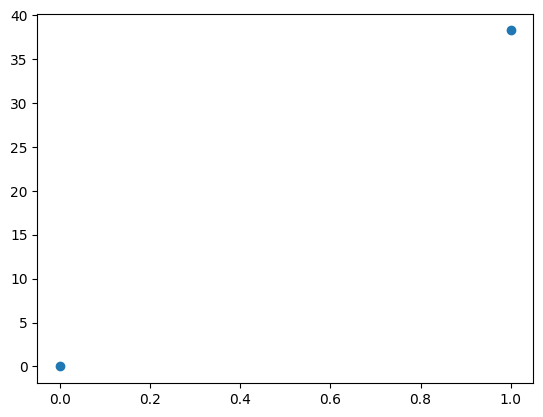

In [248]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sam_rate, hop_length=h_l) 
plt.scatter(frames,t)

In [249]:
sig = dict( 
    number=[b0,c0,d0,e0,f0],
    stage=[ "Open", "High", "Low", "Close",'volume'])
fig = px.funnel(data, x=t, y=frames)
fig.show()

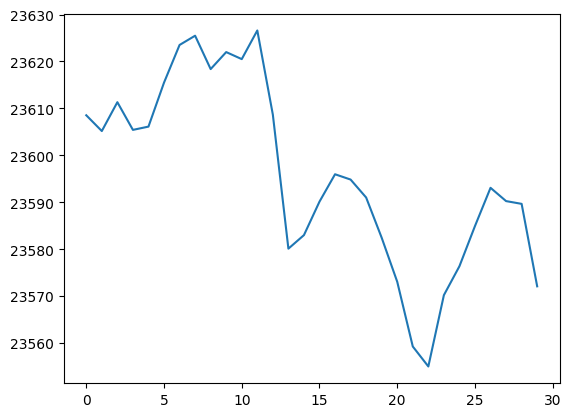

In [250]:
def strip(x, frame_length, hop_length):

    # Compute RMSE.
    rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
    
    # Identify the first frame index where RMSE exceeds a threshold.
    thresh = 0.01
    frame_index = 0
    while rmse[0][frame_index] < thresh:
        frame_index += 1
        
    # Convert units of frames to samples.
    start_sample_index = librosa.frames_to_samples(frame_index, hop_length=hop_length)
    
    # Return the trimmed signal.
    return x[start_sample_index:]
y = strip(reg.predict(X_test), f_l, h_l) #0,500
plt.plot(y)

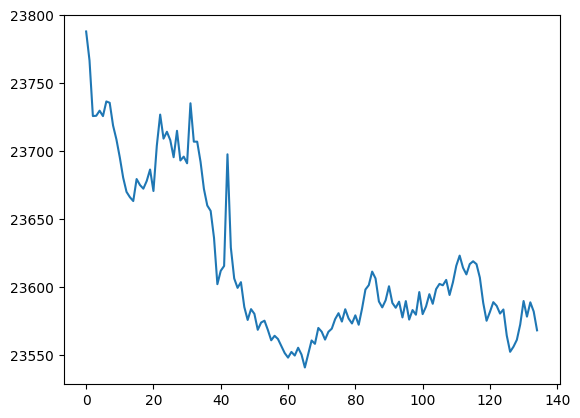

In [251]:
yl = strip(reg1.predict(Xl_test), f_l, h_l) #0,500
plt.plot(yl)

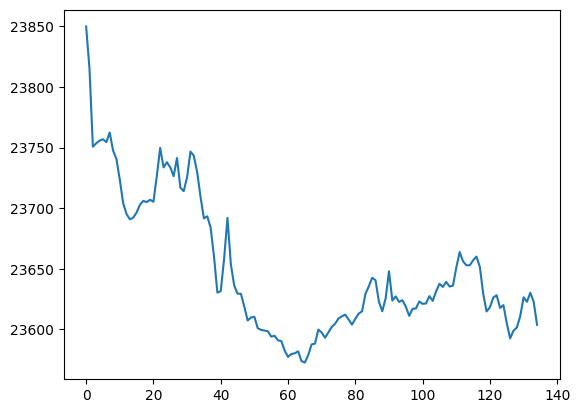

In [252]:
yh = strip(reg2.predict(Xh_test), f_l, h_l) #0,500
plt.plot(yh)

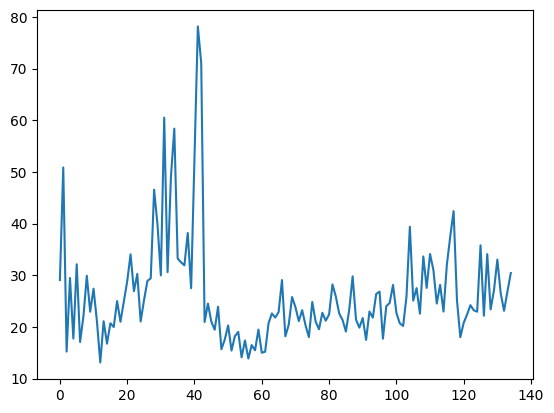

In [253]:
yv = strip(reg3.predict(Xv_test), f_l, h_l) #0,500
plt.plot(yv)

In [255]:
test_size = .15
data = dict(
    number=[first_iteration['time']*test_size,[first_iteration['volume']]],
    stage=[ "Open", "High", "Low", "Close",'Volume'])
fig = px.funnel(first_iteration, x=first_iteration['time'][:135], y=reg3.predict(Xv_test)[:135],title='Sounds of Crypto',labels=())

fig.show()
fig.write_html("data/signal.html")

### Quik vol_sigs inspekts 

In [256]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate*.45]], y=[[yv_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min()*.45, sam_rate.max()*.45], autorange=False),
        yaxis=dict(range=[yv_test.min(),yv_test.max()], autorange=False),
        title="Locating Open Recieving Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:-1]], y=[[Xv_test[0:-1]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:-1]], y=[[Xv_test[10:-1]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:-1]], y=[[Xv_test[20:-1]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:-1]], y=[[Xv_test[27:-1]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:-1]], y=[[reg.predict(Xv_test[5:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:-1]], y=[[reg.predict(Xv_test[10:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:-1]], y=[[reg.predict(Xv_test[15:-1])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:-1]], y=[[reg.predict(Xv_test[20:-1])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[196:-1]], y=[[Xv_test[196:-1]]])],
                     
                     
                     layout=go.Layout(title_text="End of Signals"))]
    
)


fig.show()

### TRANSMIT BUY SIGNAL

In [257]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate]], y=[[yl_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
        yaxis=dict(range=[yl_test.min(),yl_test.max()], autorange=True),
        title="Transmitting Buy Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xl_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xl_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xl_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xl_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg1.predict(X_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg1.predict(X_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg1.predict(X_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg1.predict(X_test[20:25])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[201:-1]], y=[[reg1.predict(Xl_test[25:-1])]])],
                     
                     
                     layout=go.Layout(title_text="End of Receiving Low Signal"))]
    
)


fig.show()
fig.write_html("filezrx.html")

In [258]:
fig = go.Figure(
    data=[go.Scatter(x=[[sam_rate]], y=[[yh_test]])],
    layout=go.Layout(
        xaxis=dict(range=[sam_rate.min(), sam_rate.max()], autorange=True),
        yaxis=dict(range=[yh_test.min(),yh_test.max()], autorange=True),
        title="Transmitting  high,open,low Signals",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    
    frames=[
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[X_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[X_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[X_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[X_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xl_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xl_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xl_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xl_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[166:176]], y=[[Xh_test[0:10]]])]), 
            go.Frame(data=[go.Scatter(x=[time[176:186]], y=[[Xh_test[10:20]]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:193]], y=[[Xh_test[20:27]]])]),
            go.Frame(data=[go.Scatter(x=[time[193:195]], y=[[Xh_test[27:29]]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg.predict(X_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg.predict(X_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg.predict(X_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg.predict(X_test[20:25])]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg1.predict(Xl_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg1.predict(Xl_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg1.predict(Xl_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg1.predict(Xl_test[20:25])]])]),
            go.Frame(data=[go.Scatter(x=[time[171:181]], y=[[reg2.predict(Xh_test[5:10])]])]), 
            go.Frame(data=[go.Scatter(x=[time[186:191]], y=[[reg2.predict(Xh_test[10:15])]])]), 
            go.Frame(data=[go.Scatter(x=[time[191:196]], y=[[reg2.predict(Xh_test[15:20])]])]), 
            go.Frame(data=[go.Scatter(x=[time[196:201]], y=[[reg2.predict(Xh_test[20:25])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][79:85]], y=[[reg.predict(X_test[79:201])]])]),
#             go.Frame(data=[go.Scatter(x=[a1[['time']][85:92]], y=[[reg.predict(X_test[201:207])]])]),        
            go.Frame(data=[go.Scatter(x=[time[201:-1]], y=[[reg2.predict(Xh_test[25:-1])]])],
                     
                     
                     layout=go.Layout(title_text="End of Predicting All Received Signals based on high,open,low"))]
    
)


fig.show()
print('predicted market cap per signal {}'.format((reg.predict(X_test[0:10])*background[0:10])))
print('predicted market cap per signal {}'.format((reg.predict(X_test[10:20])*background[10:20])))
print('predicted market cap per signal {}'.format((reg.predict(X_test[20:27])*background[20:27]))) 
print('predicted market cap per signal {}'.format((reg.predict(X_test[27:29])*background[27:29])))
import os

if not os.path.exists("images"):
    os.mkdir("images")

reg2.predict(Xh_test[25:-1])
fig.write_html("data/high_low_open.html")

predicted market cap per signal 0    157875.224905
1    201408.599837
2    263284.509466
3    302528.358296
4    310537.731396
5    286922.085906
6    186234.189193
7    295461.734379
8    268933.922794
9    454120.265910
Name: volume, dtype: float64
predicted market cap per signal 10    319040.903191
11    298636.208201
12    418736.116609
13    635085.934247
14    344670.077083
15    148203.188168
16    470167.030088
17    232100.421669
18    286652.090982
19    297912.641888
Name: volume, dtype: float64
predicted market cap per signal 20    431417.021010
21    239121.205450
22    234345.239728
23    241898.827828
24    303095.912957
25    952572.484078
26    522516.211528
Name: volume, dtype: float64
predicted market cap per signal 27    356960.849827
28    579789.021748
Name: volume, dtype: float64


In [259]:
reg.predict(X_test[25:-1])

array([23584.91995232, 23593.06290396, 23590.23264356, 23589.64430794])

In [260]:
reg1.predict(Xl_test[25:-1])

array([23708.17482474, 23695.59361045, 23715.00779129, 23693.20070297,
       23696.01153081, 23691.12267809, 23735.26749557, 23707.03634328,
       23707.02890519, 23692.15381812, 23672.25449368, 23660.06038078,
       23656.08934776, 23636.26601536, 23602.20123661, 23612.02686172,
       23615.58600147, 23697.72509777, 23629.13033605, 23606.41220298,
       23599.47943471, 23603.66797279, 23585.41308048, 23575.87137575,
       23583.82394603, 23580.37747372, 23568.62595682, 23573.96657885,
       23575.33398242, 23568.54927597, 23560.91435652, 23564.22763522,
       23561.87227325, 23556.71424769, 23551.56172801, 23548.17685114,
       23552.35795925, 23549.69882065, 23555.42867331, 23550.43121553,
       23540.91067415, 23550.95908931, 23560.78518351, 23558.30498697,
       23569.99393326, 23567.22889604, 23561.42075913, 23567.15716884,
       23569.46595272, 23576.50392817, 23580.84523829, 23574.68843214,
       23583.74305473, 23576.90588098, 23573.27631473, 23579.26311875,
      

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 2., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([23721.33 , 23726.905, 23732.48 , 23738.055, 23743.63 , 23749.205,
        23754.78 , 23760.355, 23765.93 , 23771.505, 23777.08 ]),
 array([23718.90623675, 23725.82413946, 23732.74204217, 23739.65994488,
        23746.57784759, 23753.4957503 , 23760.41365301, 23767.33155572,
        23774.24945843, 23781.16736114, 23788.08526385]),
 <matplotlib.collections.QuadMesh at 0x1ab136b2a08>)

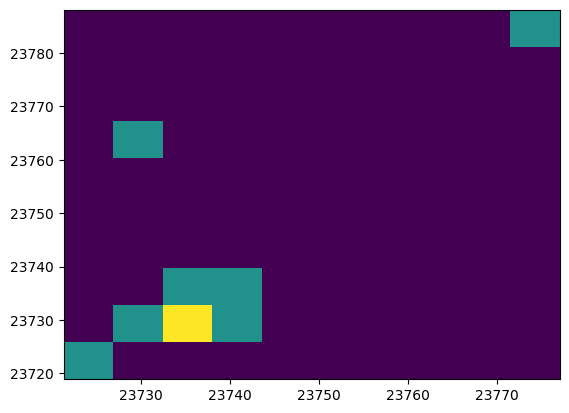

In [261]:
plt.hist2d(yl_test[0:9],reg1.predict(Xl_test[0:9]))

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 2., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]]),
 array([23738.37, 23743.38, 23748.39, 23753.4 , 23758.41, 23763.42,
        23768.43, 23773.44, 23778.45, 23783.46, 23788.47]),
 array([23699.3302557 , 23707.28704855, 23715.24384139, 23723.20063424,
        23731.15742708, 23739.11421993, 23747.07101277, 23755.02780562,
        23762.98459846, 23770.94139131, 23778.89818415]),
 <matplotlib.collections.QuadMesh at 0x1ab16c33888>)

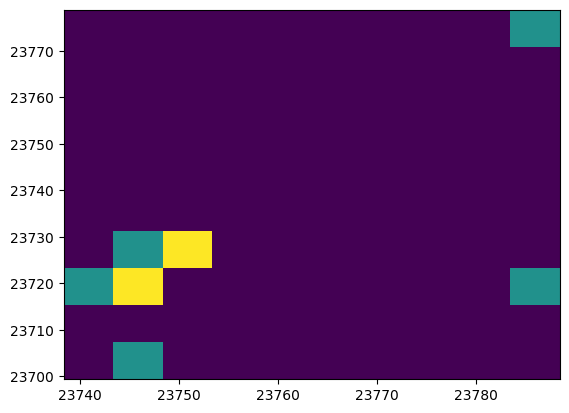

In [262]:
plt.hist2d(yh_test[0:9],reg1.predict(Xh_test[0:9]))

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([23595.   , 23597.716, 23600.432, 23603.148, 23605.864, 23608.58 ,
        23611.296, 23614.012, 23616.728, 23619.444, 23622.16 ]),
 array([23605.16732284, 23607.19954413, 23609.23176541, 23611.2639867 ,
        23613.29620799, 23615.32842927, 23617.36065056, 23619.39287185,
        23621.42509313, 23623.45731442, 23625.48953571]),
 <matplotlib.collections.QuadMesh at 0x1ab1994ea48>)

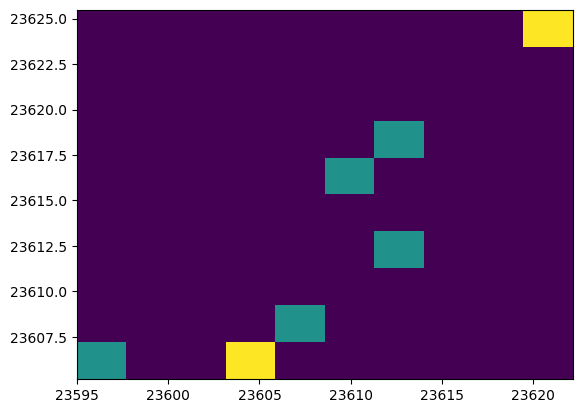

In [263]:
plt.hist2d(y_test[0:9],reg.predict(X_test[0:9]))

In [264]:
reg1.score(Xl_test,yl_test)

0.9272184109376925